# Basic Model

## Target
Construct `Basic Structure` of model with the prior knowledge that

- Structures in MNIST images are visible at a level of 5x5, i.e Max pooling must be performed at receptive field of 5x5.

- Go up to 32 channels to reduce total number of parameters.

- No Batch Normalization, Augmentation or Regularization to be used.

## Results
`Total parameters:` 13,584

- No dropout, Batch normalization or additional regularization used

- Best training accuracy: 98.70% 15th Epoch

- Best testing accuracy: 98.80% 14th Epoch

## Analysis
- Both training and testing accuracy gradually increase together up to ~99%

- Overfitting is minimal considering low difference between testing and training accuracies (except in the last 2 epochs).

- Since the base model performs well without batch normalization or other significant additions, we can further reduce the number of parameters to improve model efficiency.

## Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

BASE_DIR='/content/drive/My Drive/S7'
%cd $BASE_DIR

Mounted at /content/drive
/content/drive/My Drive/S7


In [3]:
from model_1 import Net, model_summary, model_train, model_test, draw_graphs

## Data Transformations

In [4]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [5]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 126016407.60it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 19160976.56it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 35918685.16it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7934414.31it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Dataloaders

In [6]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Model Summary

In [7]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
model_summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
            Conv2d-3           [-1, 32, 24, 24]           4,608
              ReLU-4           [-1, 32, 24, 24]               0
            Conv2d-5           [-1, 10, 24, 24]             320
         MaxPool2d-6           [-1, 10, 12, 12]               0
            Conv2d-7           [-1, 16, 10, 10]           1,440
              ReLU-8           [-1, 16, 10, 10]               0
            Conv2d-9             [-1, 16, 8, 8]           2,304
             ReLU-10             [-1, 16, 8, 8]               0
           Conv2d-11             [-1, 16, 6, 6]           2,304
             ReLU-12             [-1, 16, 6, 6]               0
           Conv2d-13             [-1, 16, 6, 6]           2,304
             ReLU-14             [-1, 1

## Train & Test

In [8]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    model_train(model, device, train_loader, optimizer, epoch)
    model_test(model, device, test_loader)

EPOCH: 1


Loss=2.278486490249634 Batch_id=468 Accuracy=9.66: 100%|██████████| 469/469 [00:19<00:00, 24.49it/s]



Test set: Average loss: 2.2847, Accuracy: 1069/10000 (10.69%)

EPOCH: 2


Loss=0.18514232337474823 Batch_id=468 Accuracy=58.53: 100%|██████████| 469/469 [00:18<00:00, 24.94it/s]



Test set: Average loss: 0.2705, Accuracy: 9161/10000 (91.61%)

EPOCH: 3


Loss=0.10579072684049606 Batch_id=468 Accuracy=93.81: 100%|██████████| 469/469 [00:17<00:00, 27.18it/s]



Test set: Average loss: 0.1163, Accuracy: 9615/10000 (96.15%)

EPOCH: 4


Loss=0.20994628965854645 Batch_id=468 Accuracy=96.16: 100%|██████████| 469/469 [00:18<00:00, 25.82it/s]



Test set: Average loss: 0.0900, Accuracy: 9714/10000 (97.14%)

EPOCH: 5


Loss=0.07292070239782333 Batch_id=468 Accuracy=97.17: 100%|██████████| 469/469 [00:17<00:00, 27.11it/s]



Test set: Average loss: 0.0727, Accuracy: 9763/10000 (97.63%)

EPOCH: 6


Loss=0.12246667593717575 Batch_id=468 Accuracy=97.49: 100%|██████████| 469/469 [00:17<00:00, 27.07it/s]



Test set: Average loss: 0.0542, Accuracy: 9818/10000 (98.18%)

EPOCH: 7


Loss=0.060126010328531265 Batch_id=468 Accuracy=97.76: 100%|██████████| 469/469 [00:17<00:00, 27.02it/s]



Test set: Average loss: 0.0778, Accuracy: 9750/10000 (97.50%)

EPOCH: 8


Loss=0.08504557609558105 Batch_id=468 Accuracy=98.02: 100%|██████████| 469/469 [00:17<00:00, 26.77it/s]



Test set: Average loss: 0.0484, Accuracy: 9849/10000 (98.49%)

EPOCH: 9


Loss=0.016920069232583046 Batch_id=468 Accuracy=98.10: 100%|██████████| 469/469 [00:18<00:00, 24.73it/s]



Test set: Average loss: 0.0472, Accuracy: 9841/10000 (98.41%)

EPOCH: 10


Loss=0.05817731097340584 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:17<00:00, 27.00it/s]



Test set: Average loss: 0.0437, Accuracy: 9845/10000 (98.45%)

EPOCH: 11


Loss=0.08688756078481674 Batch_id=468 Accuracy=98.41: 100%|██████████| 469/469 [00:17<00:00, 27.22it/s]



Test set: Average loss: 0.0449, Accuracy: 9859/10000 (98.59%)

EPOCH: 12


Loss=0.08843183517456055 Batch_id=468 Accuracy=98.52: 100%|██████████| 469/469 [00:18<00:00, 25.40it/s]



Test set: Average loss: 0.0428, Accuracy: 9861/10000 (98.61%)

EPOCH: 13


Loss=0.024848228320479393 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:17<00:00, 27.02it/s]



Test set: Average loss: 0.0590, Accuracy: 9829/10000 (98.29%)

EPOCH: 14


Loss=0.0658031553030014 Batch_id=468 Accuracy=98.64: 100%|██████████| 469/469 [00:17<00:00, 26.69it/s]



Test set: Average loss: 0.0359, Accuracy: 9880/10000 (98.80%)

EPOCH: 15


Loss=0.012522530741989613 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:17<00:00, 27.13it/s]



Test set: Average loss: 0.0332, Accuracy: 9878/10000 (98.78%)



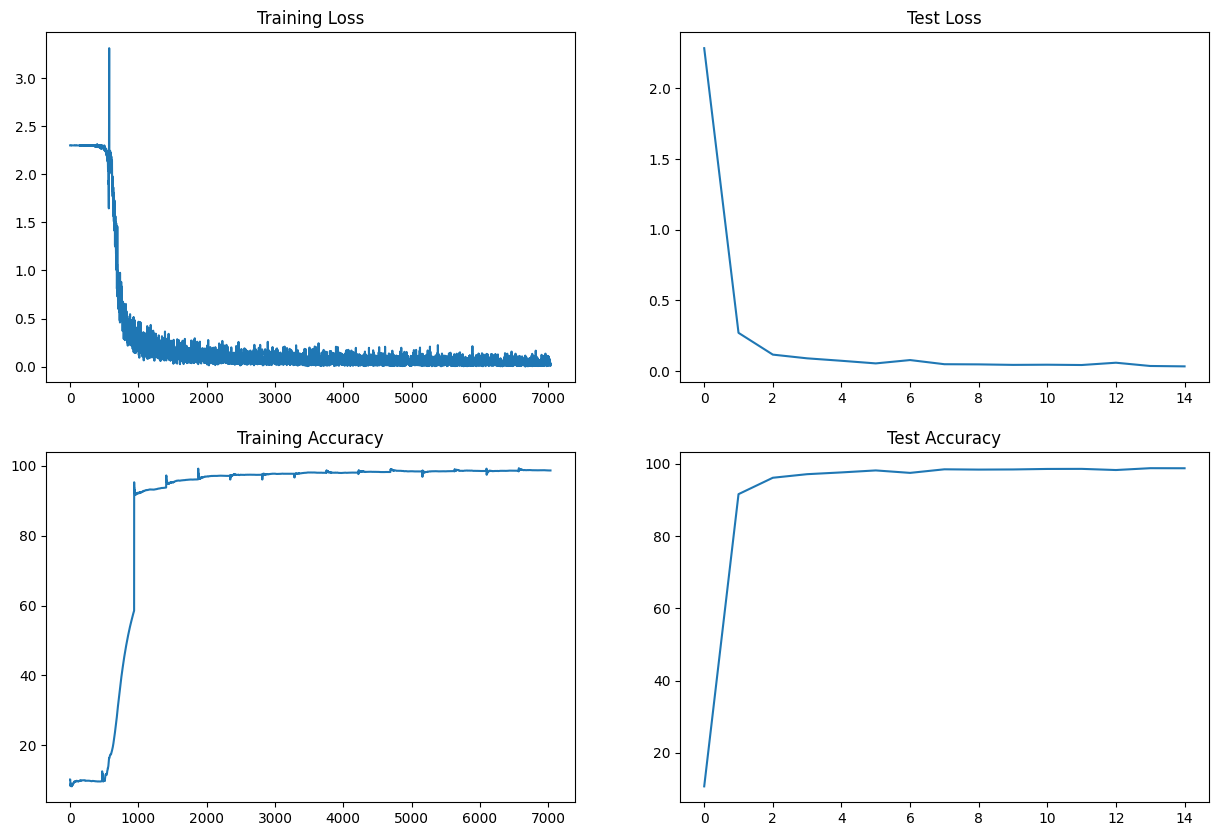

In [9]:
draw_graphs()